<h1><center>Netflix TV Shows And Movie Analysis</center></h1>

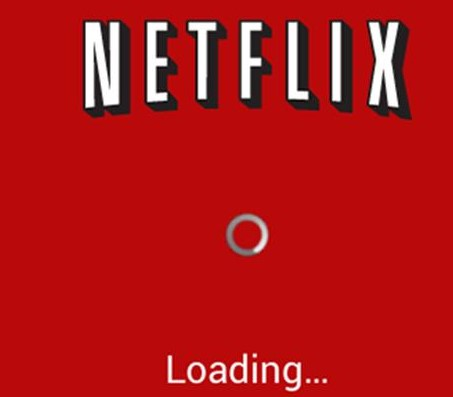


#####  Image credit:https://streamdiag.com/netflix-is-stuck-on-loading-screen-fix/

Netflix was founded in 1997 by Reed Hastings and Marc Randolph
The company's primary business is a subscription-based streaming service offering online streaming.
Netflix is headquartered in Los Gatos, California.
In this Analysis we will answer the following questions through visualistions

### Questions
1. What contents Neflix has most
2. Top contents by ratings
3. Countries with most content
4. Busiest month for content release
5. Total contents by Season
6. Top ten TV shows
7. Movie released by ratings since 2016
8. Tv Shows India has by ratings
9. Tv Shows USA has by ratings
10. Top 10 Movie genre

 ### Import Necessary Libraries 

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
%matplotlib inline
import requests
import re

### Load the Dataset

In [ ]:
netflix = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
netflix.head(3)

# Exploratory Data Analysis

In [ ]:
netflix.info()

In [ ]:
netflix.columns

In [ ]:
netflix.nunique()

### Check for Missing Values

In [ ]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("green", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(netflix)

### Handling Missing Values

Replace missing values with mode for ratings and country  column

In [ ]:
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix[['rating','country']].isna().sum()

Replace nan values in data_added with January 1

In [ ]:
netflix['date_added']=netflix['date_added'].fillna('January 1, {}'.format(str(netflix['release_year'].mode()[0])))
netflix['date_added'].isna().sum()

 Drop missing value rows from director and cast columns

In [ ]:
netflix.drop(['director','cast'],axis = 1,inplace = True)

 verify dataset has no missing values

In [ ]:
netflix.isna().sum()

 Convert duration to numeric

In [ ]:
netflix['duration'] = netflix['duration'].map(lambda x : re.sub('[^0-9]','',x))
netflix['duration'] = pd.to_numeric(netflix['duration'])
netflix.head(3)

# Data visualization

##### Movies vs TV Show

In [ ]:
plt.figure(figsize= (8,5))
sns.set_style(style = 'darkgrid')

ax = sns.countplot(x = 'type',data  = netflix, palette = 'Set2')
plt.title('Movie Vs TV Show')

##### Number of Contents by Ratings

In [ ]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,3))
ax = sns.countplot(x ='rating', data = netflix,palette = 'Set2')
plt.title('Count of Content Ratings',fontsize = 15)
plt.xticks(rotation =90)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('Total Count',fontsize = 15)

##### Total number of Tv Shows and Movies by Ratings

In [ ]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,8))
ax = sns.countplot(data = netflix, x= 'rating',hue = 'type', palette='Set2' )
plt.xticks(rotation = 90)
plt.title('Content Ratings TV Shows vs Movie', fontsize = 15)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('Total Count',fontsize = 15)

##### Contries with most contents

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'country',data= netflix, palette ='gist_rainbow', order = netflix['country'].value_counts().index[0:15])
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.title('Countries with most content(Top 15)')
plt.ylabel('Number of Movies and TV Shows')

##### Busiest Month for Content Release

In [ ]:
netflix['release_month'] = netflix['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

sns.countplot(y = 'release_month',data = netflix,palette ='Pastel1', order = netflix['release_month'].value_counts().index)
plt.title('Movies/Tv show releases by month')
plt.ylabel('Release Month')
plt.xlabel('No. of Releases')

##### Count of TV Shows by number of seasons

In [ ]:
plt.figure(figsize= (10,5))
tv_show = netflix[netflix['type']== 'TV Show']

sns.countplot(x = 'duration',data = tv_show,palette = 'Oranges_r', order = tv_show['duration'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel("Seasons",fontsize = 15)
plt.ylabel("Total count",fontsize = 15)
plt.title("Total Tv Show Season wise",fontsize = 15)


##### Movie Duration

In [ ]:
movie_duration = netflix.loc[netflix['type']=='Movie']

plt.figure(figsize=(12,10))

ax = sns.histplot(data = movie_duration,x = 'duration',bins = 50,kde = True,color = 'red')
plt.title('Movie Duration',fontsize = 15)
plt.xlabel('Total Duration(In Mins)',fontsize = 15)
plt.ylabel('Total Movie Count',fontsize = 15)

##### TOP 10 TV Show

In [ ]:
tv_shows = netflix.loc[netflix['type']=='TV Show']

top10_shows = tv_shows.sort_values(by=['duration'])[-1:-11:-1]
top10_shows[['title','duration']]
plt.figure(figsize=(8,10))
sns.barplot(y = top10_shows['title'], x = top10_shows['duration'])
plt.title('Top 10 TV Shows',fontsize = 15)
plt.xlabel('No.of Seasons',fontsize = 15)
plt.ylabel('TV Shows',fontsize = 15)

#####  Trend of movie ratings that has been released over the last five years


In [ ]:
movie = netflix.loc[netflix['type']=='Movie']
movie_trends = movie[movie['release_year']>=2016]
df = movie_trends.groupby(['release_year','rating']).size().reset_index(name = 'Total')
df1 = df[df['Total'] >= 10]

plt.figure(figsize = (10,8))
sns.set_style('darkgrid')
sns.barplot(data = df1,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('Movies released by rating since 2016 and beyond(more than 10 releases per year)')
plt.xlabel('Year')
plt.ylabel('Total Count')


##### Tv Shows India has by rating

In [ ]:
df = netflix[(netflix['type'] == 'TV Show') & (netflix['country'] == 'India') ]
tv_show_India = df.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (12,10))
sns.set_style('darkgrid')
sns.barplot(data = tv_show_India,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released by India by ratings',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)

##### Tv Shows USA has by rating

In [ ]:
tv_show_USA= netflix[(netflix['type'] == 'TV Show') & (netflix['country'] == 'United States') ]

tv_show_USA = tv_show_USA[tv_show_USA['release_year']>=2010]

df = tv_show_USA.groupby(['release_year','rating']).size().reset_index(name = 'Total')

plt.figure(figsize = (12,10))
sns.set_style('darkgrid')
sns.barplot(data = df,x = 'release_year', y = 'Total',hue = 'rating',palette = 'Set1')
plt.title('TV shows released by United States by ratings')

##### Top Ten Movie genre

In [ ]:
movie_genre = netflix.loc[netflix['type'] == 'Movie']
plt.figure(figsize=(12,6))
ax = sns.countplot(y='listed_in',data = movie_genre,order = movie_genre["listed_in"].value_counts().index[0:10],palette="Set2")
plt.title('Top Ten Movie Genre',fontsize = 15)
plt.xlabel('Total Count',fontsize = 15)
plt.ylabel('Genre',fontsize = 15)

##### Top Ten TV Show genre

In [ ]:
Tv_Show_genre = netflix.loc[netflix['type'] == 'TV Show']
plt.figure(figsize=(12,6))
ax = sns.countplot(y='listed_in',data = Tv_Show_genre,order = Tv_Show_genre["listed_in"].value_counts().index[0:10],palette="Set2")
plt.title('Top Ten Tv Show Genre',fontsize = 15)
plt.xlabel('Total Count',fontsize = 15)
plt.ylabel('Genre',fontsize = 15)

### Trends of content released Year over Year

In [ ]:
df = netflix[netflix['type'] == 'TV Show'].groupby('release_year').count()[-25:-1]
df1 = netflix[netflix['type'] == 'Movie'].groupby('release_year').count()[-25:-1]
df2 = netflix.groupby('release_year').count()[-25:-1]


plt.figure(figsize = (15,8))
sns.set_style('darkgrid')
sns.lineplot(data = df['show_id'],palette = 'Set1')
sns.lineplot(data = df1['show_id'],palette = 'Set1')
sns.lineplot(data = df2['show_id'],palette = 'Set1')
plt.title('Year over Year Content Released',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('No.of Shows',fontsize = 15)
plt.legend(['TV', 'Movie','Total'], fontsize='large')

###  Word Cloud

##### Count of most used words in 'listed in' 

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(netflix['listed_in']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


##### Count of most used word in 'Description'

In [ ]:
words = (str(netflix['description']))
mask = np.array(Image.open(requests.get('https://i.stack.imgur.com/B0AAW.png',stream=True).raw))


def create_wordcloud(words, mask):
    wc = WordCloud(width =500, height =800, background_color='white', 
                   stopwords=STOPWORDS, mask=mask,max_font_size =40,
                  repeat=True,max_words = 300).generate(words)

    plt.figure(figsize=(15,15))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    

create_wordcloud(words, mask)


### Findings
1. Netflix has more movies than Tv shows
2. Netflix has TV-MA ratings the most
3. USA is by far the top contributer followed by India
4. December is the busiest month for contents release followed by October
5. Most of the contents has only 1 season
6. Grey's Anatomy tops the list with most seasons(16) followed by NCIS. Cheers is number 10 with 10 seasons
7. Since 2016 TV-MA has been released the most
8. India has shifted towards TV-MA ratings after 2017. Before that it was mostly TV-14 ratings
9. Same with USA, TV-MA content has increased since 2017.